<a href="https://colab.research.google.com/github/Ben-Ogega/Natural_Language_Processing/blob/main/nlp_in_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Importing the libraries

In [2]:
!pip install tensorflow --quiet
!pip install keras_nlp --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.1/590.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 110.9 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import keras_nlp
import tensorflow_datasets as tfds

Using TensorFlow backend


In [4]:
sentences = [
    'I love my dog',
    'I love my cat',
    'You love your dog!'
]

In [5]:
# Create an Instance of the class Tokenizer

tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [6]:
print(word_index)

{'love': 1, 'i': 2, 'my': 3, 'dog': 4, 'cat': 5, 'you': 6, 'your': 7}


## Turning Sentences into data - Sequencing

In [7]:
sentences = [
    'I love my dog',
    'I love my cat',
    'Do you think my dog is amazing?'
]



In [8]:
tokenizer = Tokenizer(num_words=100, oov_token='<oov>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [9]:
sequences = tokenizer.texts_to_sequences(sentences)

In [10]:
print(word_index)
print(" ")
print(sequences)

{'<oov>': 1, 'my': 2, 'i': 3, 'love': 4, 'dog': 5, 'cat': 6, 'do': 7, 'you': 8, 'think': 9, 'is': 10, 'amazing': 11}
 
[[3, 4, 2, 5], [3, 4, 2, 6], [7, 8, 9, 2, 5, 10, 11]]


In [11]:
test_data = [
    'i really love my dog',
    'my dog loves my manatee'
]

In [12]:
test_seq = tokenizer.texts_to_sequences(test_data)
print(word_index)
print(test_seq)

{'<oov>': 1, 'my': 2, 'i': 3, 'love': 4, 'dog': 5, 'cat': 6, 'do': 7, 'you': 8, 'think': 9, 'is': 10, 'amazing': 11}
[[3, 1, 4, 2, 5], [2, 5, 1, 2, 1]]


## Use padding

**pad_sequences** is a function in the **tensorflow.keras.preprocessing.**sequence module that is used to pad sequences to the same length. This is useful when working with text data, where sequences of words or characters may have different lengths. The function takes a **sequence of integers as input** and **pads it with zeros to a specified length**.

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
sentences = [
    'I love my dog',
    'I love my cat',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words=100, oov_token='<oov>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding='post')
print(word_index)
print('\n')
print(sequences)
print('\n')
print(padded)

{'<oov>': 1, 'my': 2, 'i': 3, 'love': 4, 'dog': 5, 'cat': 6, 'do': 7, 'you': 8, 'think': 9, 'is': 10, 'amazing': 11}


[[3, 4, 2, 5], [3, 4, 2, 6], [7, 8, 9, 2, 5, 10, 11]]


[[ 3  4  2  5  0  0  0]
 [ 3  4  2  6  0  0  0]
 [ 7  8  9  2  5 10 11]]


## Training a Model to recognize sentiment in text

In [15]:
import json

In [16]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [17]:
!wget --no-check-certificate \
    https://storage.googleapis.com/learning-datasets/sarcasm.json \
    -O /tmp/sarcasm.json


--2023-10-30 08:21:43--  https://storage.googleapis.com/learning-datasets/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.207, 173.194.74.207, 173.194.192.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.04s   

2023-10-30 08:21:43 (133 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [18]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [19]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [21]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 29s - loss: 0.6700 - accuracy: 0.5776 - val_loss: 0.6087 - val_accuracy: 0.6672 - 29s/epoch - 46ms/step
Epoch 2/30
625/625 - 4s - loss: 0.4564 - accuracy: 0.8197 - val_loss: 0.3933 - val_accuracy: 0.8371 - 4s/epoch - 6ms/step
Epoch 3/30
625/625 - 3s - loss: 0.3184 - accuracy: 0.8745 - val_loss: 0.3625 - val_accuracy: 0.8390 - 3s/epoch - 5ms/step
Epoch 4/30
625/625 - 2s - loss: 0.2667 - accuracy: 0.8965 - val_loss: 0.3432 - val_accuracy: 0.8572 - 2s/epoch - 4ms/step
Epoch 5/30
625/625 - 2s - loss: 0.2295 - accuracy: 0.9103 - val_loss: 0.3411 - val_accuracy: 0.8575 - 2s/epoch - 3ms/step
Epoch 6/30
625/625 - 2s - loss: 0.2026 - accuracy: 0.9228 - val_loss: 0.3478 - val_accuracy: 0.8566 - 2s/epoch - 4ms/step
Epoch 7/30
625/625 - 3s - loss: 0.1799 - accuracy: 0.9320 - val_loss: 0.3570 - val_accuracy: 0.8533 - 3s/epoch - 5ms/step
Epoch 8/30
625/625 - 2s - loss: 0.1623 - accuracy: 0.9402 - val_loss: 0.3744 - val_accuracy: 0.8509 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 

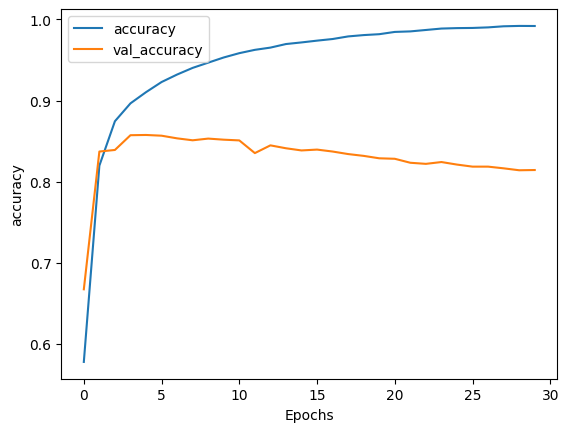

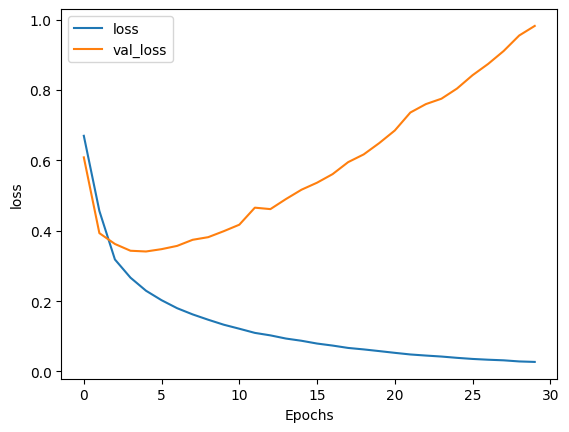

In [25]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [26]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [27]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [28]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [29]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 72ms/step
[[9.0041131e-01]
 [7.8749516e-05]]


## Test with random sacarstic texts

In [31]:
sarcy_sentences = ["former versace store clerk sues over secret 'black code' for minority shoppers",
                   "grany starting to fear spiders in the garden might be real",
                   "the weather today is bright and sunny"]

In [32]:
sequences = tokenizer.texts_to_sequences(sarcy_sentences)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

1/1 [==============================] - 0s 20ms/step
[[1.7538665e-05]
 [9.0041131e-01]
 [5.0940034e-05]]
